In [13]:
#Estableciendo el directorio de trabajo
os.chdir(r"D:/ACADEMY/ANALYTICS/SCRIPTS/Python/TextAnalysis")

In [62]:
from wordcloud import WordCloud
from wordcloud import ImageColorGenerator
from wordcloud import STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd
from stop_words import get_stop_words

In [66]:
fileName='Reclamos_SUR.csv'

In [67]:
data = pd.read_csv(fileName,delimiter=';')

In [68]:
data.head()

,NUMERO_RECLAMO,OBS_RECLAMO,FECHA_INGRESO_RECLAMO,CODIGO_ESTADO,DESC_ESTADO,FECHA_DESDE_EN_ESTADO,CODIGO_AREA,DESC_AREA,CODIGO_GRUPO,DESC_GRUPO,CODIGO_TIPOPROBLEMA,DESC_TIPOPROBLEMA,COORD_X,COORD_Y
0,2816,Valentín Alvarez entre Calderón de la Barca y ...,30/12/2016,40,Finalizado,30/12/2016,41,Calles y veredas,221,Viales,401,Bache,570526.709,6.147878e+06
1,2818,Basural fuera contenedor calle Virrey Elio y B...,01/01/2018,40,Finalizado,28/04/2021,1,Limpieza,623,Estado de los contenedores,1421,Contenedor roto,579076.7003,6.142999e+06
2,2819,A pesar de que en el barrio existen esquinas m...,01/01/2019,40,Finalizado,22/01/2019,1,Limpieza,623,Estado de los contenedores,1424,Solicitar traslado de contenedor,578941.1889,6.137948e+06
3,2820,Sofa cama averiado,01/01/2020,40,Finalizado,11/03/2020,1,Limpieza,622,"Solicitud de retiro de poda, escombros o resid...",1402,Solicitud de retiro de otros residuos de gran ...,574150.1829,6.138185e+06
4,2821,Problema de Alumbrado Publico,01/01/2021,40,Finalizado,02/01/2021,121,Alumbrado,461,Alumbrado,821,Problema de Alumbrado Publico,579460.262961,6.137478e+06


In [69]:
stop_words_sp = get_stop_words('spanish')

In [70]:
comment_words = ''
# iterate through the csv file
for val in data.OBS_RECLAMO:
	
	# typecaste each val to string
	val = str(val)

	# split the value
	tokens = val.split()
	
	# Converts each token into lowercase
	for i in range(len(tokens)):
		tokens[i] = tokens[i].lower()
	
	comment_words += " ".join(tokens)+" "

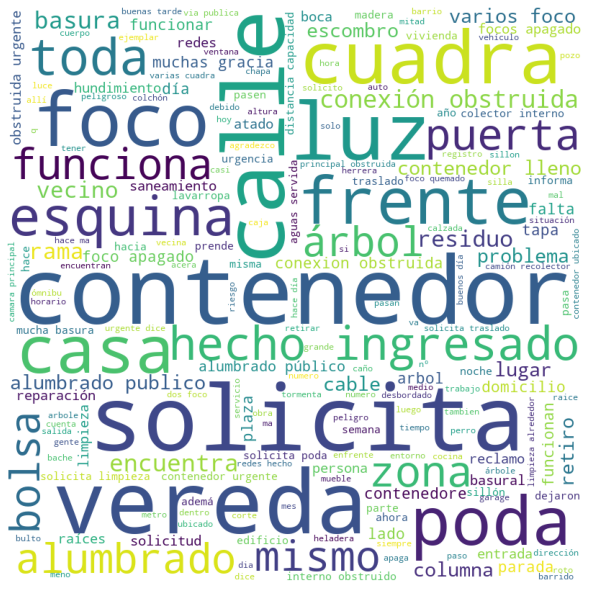

In [72]:
wordcloud = WordCloud(width = 800, height = 800,
				background_color ='white',
				stopwords = stop_words_sp,
				min_font_size = 10).generate(comment_words)

# plot the WordCloud image					
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
wordcloud.to_file('wordcloud.png') # guardar wordcloud
plt.show()